## Ex 6.1

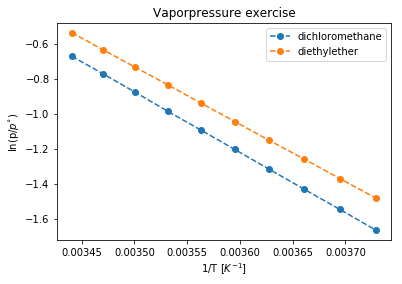

In [19]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.genfromtxt("data/dichloromethane_vaporpressure.csv",skip_header=1,delimiter=",")
data2 = np.genfromtxt("data/diethylether_vaporpressure.csv",skip_header=1,delimiter=",")

data1_T = data1[:,0] + 273.15 # Converts to kelvin
data1_p = (data1[:,1] + 1075)/1000 # Adding the reference value and converting to bar

data2_T = data2[:,0] + 273.15
data2_p = (data2[:,1] + 1075)/1000

plt.plot(1/data1_T,np.log(data1_p),linestyle='--',marker='o',label='dichloromethane')
plt.plot(1/data2_T,np.log(data2_p),linestyle='--',marker='o',label='diethylether')
plt.legend()
plt.title("Vaporpressure exercise")
plt.xlabel("1/T [$K^{-1}$]")
plt.ylabel("ln(p/$p^{\circ}$)")
plt.show()

## Ex 6.2

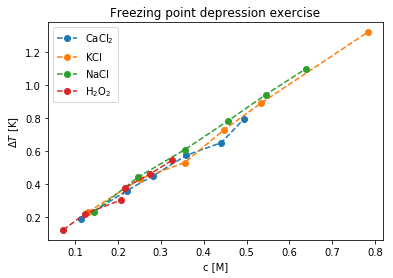

In [36]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.genfromtxt("data/CaCl2_freezing_point_depression.csv",skip_header=1,delimiter=",")
data2 = np.genfromtxt("data/KCl_freezing_point_depression.csv",skip_header=1,delimiter=",")
data3 = np.genfromtxt("data/NaCl_freezing_point_depression.csv",skip_header=1,delimiter=",")
data4 = np.genfromtxt("data/H2O2_freezing_point_depression.csv",skip_header=1,delimiter=",")

def calculate_concentration(Vsolution, ctit, Vtit, factor):
    return factor*Vtit*ctit/Vsolution

data1_T = data1[:,0]
# /1000 to make the units match
data1_c = calculate_concentration(data1[:,1]/1000, 0.1004, data1[:,2]/1000, 3/2)

data2_T = data2[:,0]
data2_c = calculate_concentration(data2[:,1]/1000, 0.1004, data2[:,2]/1000, 2)

data3_T = data3[:,0]
data3_c = calculate_concentration(data3[:,1]/1000, 0.1004, data3[:,2]/1000, 2)

data4_T = data4[:,0]
data4_c = calculate_concentration(data4[:,1]/1000, 0.02056, data4[:,2]/1000, 2.5)

plt.plot(data1_c, data1_T, linestyle='--', marker='o', label='$\mathrm{CaCl_2}$')
plt.plot(data2_c, data2_T, linestyle='--', marker='o', label='$\mathrm{KCl}$')
plt.plot(data3_c, data3_T, linestyle='--', marker='o', label='$\mathrm{NaCl}$')
plt.plot(data4_c, data4_T, linestyle='--', marker='o', label='$\mathrm{H_2O_2}$')
plt.legend()
plt.title("Freezing point depression exercise")
plt.xlabel("c [M]")
plt.ylabel("$\Delta T$ [K]")
plt.show()

## Ex 6.3

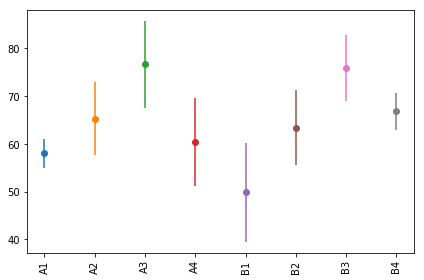

In [113]:
import numpy as np
import matplotlib.pyplot as plt

data = open("data/Molecule_life_time.csv").readlines()
x_label = []
for i in range(1, len(data)):
    data_list = data[i].split(",")
    x_label.append(data_list[0]+data_list[1])
    y_data = np.zeros(len(data_list)-2)
    for j in range(2, len(data_list)):
        y_data[j-2] = float(data_list[j])
    plt.errorbar(i, np.mean(y_data), yerr=np.std(y_data), linestyle='None', marker='o')

x_data = np.linspace(1, len(x_label), len(x_label))
plt.xticks(x_data, x_label, rotation='vertical')
plt.tight_layout()
plt.show()


## Ex 6.4

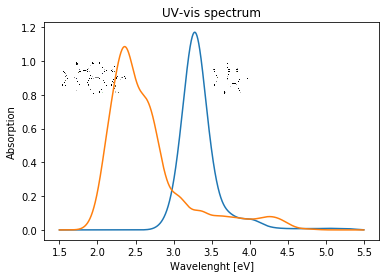

In [146]:
import numpy as np
import matplotlib.pyplot as plt

pnp1_data = np.genfromtxt("data/pnp1_spec.csv",delimiter=";")
pnp2_data = np.genfromtxt("data/pnp2_spec.csv",delimiter=";")
pnp1_img = plt.imread("data/PNP1.tif")
pnp2_img = plt.imread("data/PNP2.tif")

plt.plot(pnp1_data[:,0], pnp1_data[:,1])
plt.imshow(pnp1_img, aspect="auto", extent=(3.5, 4.0, 0.8, 1.0))
plt.imshow(pnp2_img, aspect="auto", extent=(1.52, 2.4, 0.8, 1.0))
plt.plot(pnp2_data[:,0], pnp2_data[:,1])
plt.title("UV-vis spectrum")
plt.xlabel("Wavelenght [eV]")
plt.ylabel("Absorption")
plt.show()

## Ex 6.5

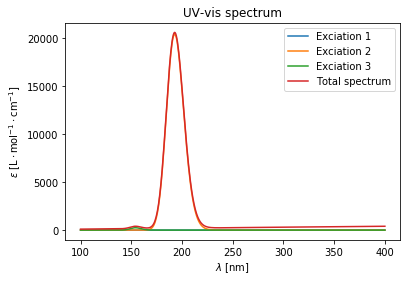

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def gauss(x, N, x_mean, sigma):
    return N/sigma*np.exp(-((x-x_mean)/sigma)**2)

x_values = np.linspace(100, 400, 500)
N = 1.3062974*10**8 * 10**(-7)
sigma = 1/3099.6
plt.plot(x_values, gauss(1/x_values, N*0.0002, 1/284.45, sigma),label="Exciation 1")
plt.plot(x_values, gauss(1/x_values, N*0.5035, 1/192.80, sigma),label="Exciation 2")
plt.plot(x_values, gauss(1/x_values, N*0.0061, 1/154.07, sigma),label="Exciation 3")
plt.plot(x_values, gauss(1/x_values, N*0.0002, 1/284.45, sigma)
         +gauss(1/x_values, N*0.5035, 1/192.80, sigma)+x_values
         +gauss(1/x_values, N*0.0061, 1/154.07, sigma), 
         label="Total spectrum")
plt.legend()
plt.title("UV-vis spectrum")
plt.xlabel("$\lambda$ [nm]")
plt.ylabel("$\epsilon$ [$\mathrm{L\cdot mol^{-1} \cdot cm^{-1}}$]")
plt.show()